In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq
import pandas as pd
import os

In [2]:
def add_graph(file_name):
    main_graph = nx.Graph()
    with open(file_name) as f:
        for line in f:
            v1, v2 ,_ = line.strip().split()
            main_graph.add_edge(v1, v2)
    return main_graph

In [6]:
airport_edges = add_graph("../Data/airports.edges")
print('Airport Dataset :')
print("Number of nodes: ", airport_edges.number_of_nodes())
print("Number of edges: ", airport_edges.number_of_edges())
print("Average degree: ", np.mean(list(dict(airport_edges.degree()).values())))


bible_edges = add_graph("../Data/bible.edges")
print('\nBible Dataset :')
print("Number of nodes: ", bible_edges.number_of_nodes())
print("Number of edges: ", bible_edges.number_of_edges())
print("Average degree: ", np.mean(list(dict(bible_edges.degree()).values())))

Airport Dataset :
Number of nodes:  1574
Number of edges:  17215
Average degree:  21.874205844980942

Bible Dataset :
Number of nodes:  1773
Number of edges:  9131
Average degree:  10.300056401579244


In [7]:
def closeness_centrality(G, improved=True):

    if G.is_directed():
        G = G.reverse()  
    path_length = nx.single_source_shortest_path_length
    nodes = G.nodes
    closeness_dict = {}
    for node1 in nodes:
        lengh_Graph = len(G)
        sp = path_length(G, node1)
        sum_values = sum(sp.values())
        closeness_centrality = 0.0
        if sum_values > 0.0 and lengh_Graph > 1:
            closeness_centrality = (len(sp) - 1.0) / sum_values
            if improved:
                a = (len(sp) - 1.0) / (lengh_Graph - 1)
                closeness_centrality *= a
        closeness_dict[node1] = closeness_centrality
    return closeness_dict


In [16]:
def plotting(G1, G2 , centrality, title):
    list_of_centrality1 = list(centrality(G1).values())
    list_of_centrality2 = list(centrality(G2).values())
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(list_of_centrality1)), list_of_centrality1 , c='g')
    plt.plot(range(len(list_of_centrality2)), list_of_centrality2,c='purple')
    plt.xlabel('Nodes')
    plt.ylabel('centrality')
    plt.title("Line plot : "+ title)
    plt.show()

    #histogram
    plt.figure(figsize=(10, 5))
    plt.hist(list_of_centrality1, bins=100, alpha=0.5, label='bible')
    plt.hist(list_of_centrality2, bins=100, alpha=0.5, label='airport')
    plt.legend(loc='upper right')
    plt.xlabel('Closeness centrality')
    plt.ylabel('Frequency')
    plt.title("Histogram : "+ title)
    plt.show()

    #bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(list_of_centrality1)), list_of_centrality1 , alpha=0.5, label='bible')
    plt.bar(range(len(list_of_centrality2)), list_of_centrality2, alpha=0.5, label='airport')
    plt.legend(loc='upper right')
    plt.xlabel('Nodes')
    plt.ylabel('centrality')
    plt.title("Bar plot : "+ title)
    plt.show()
    



In [9]:
def write_to_file(filename, data , folder_path):
    #folder_path = 'output_files'

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    # Open the file in write mode
    with open(os.path.join(folder_path, filename), "w") as file:
        # Write the data to the file
        if type(data) == list:
            for item in data:
                file.write(str(item)+'\n')
        elif type(data) == dict:
            for key, value in data.items():
                file.write(f'{key} : {value}\n')
        else:
            file.write(data)



In [10]:
path = './Results'

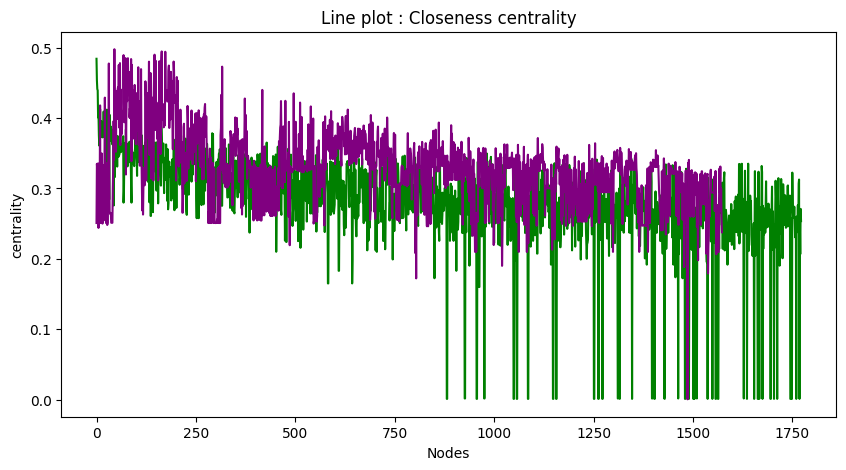

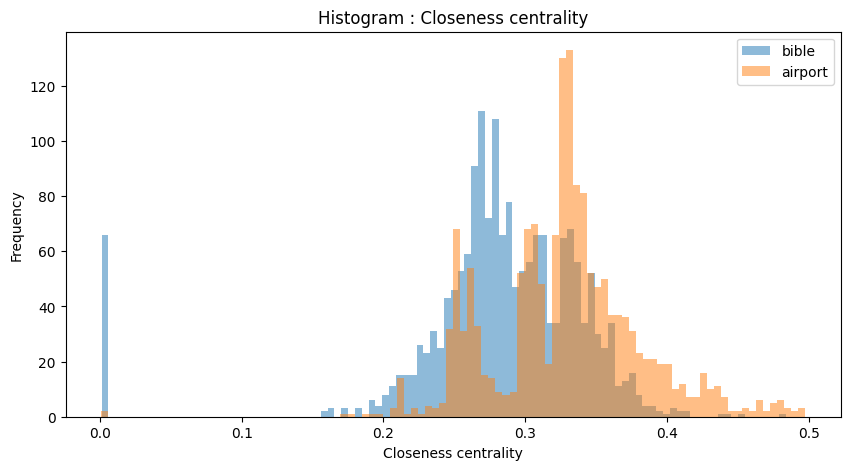

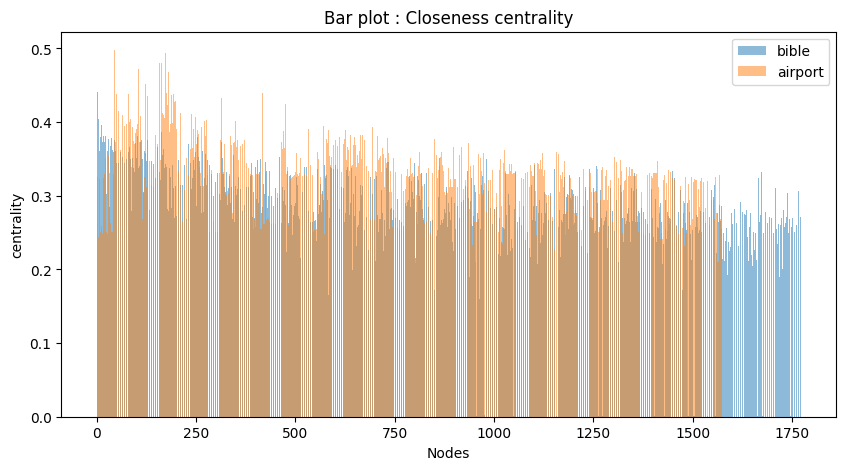

In [17]:
write_to_file('closeness_centrality_Bible_graph', closeness_centrality(bible_edges),folder_path = path)
write_to_file('closeness_centrality_airport_graph', closeness_centrality(airport_edges),folder_path = path)
plotting(bible_edges, airport_edges ,closeness_centrality, 'Closeness centrality')


In [12]:
def efficiency_centrality(G):
    results = []
    for n in G:
        distances = {node: float('inf') for node in G}
        distances[n] = 0
        queue = deque([n])
        while queue:
            current_queue = queue.popleft()
            for neighbor in G[current_queue]:
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[current_queue] + 1
                    queue.append(neighbor)
        results.append(list(distances.values()))

    results = np.array(results)
    results[np.isinf(results)] = 0

    dic = {}
    for i in range(0,len(results)):
        x = sum(results[i,:]) / len(results)
        dic[i] = x
    return dic



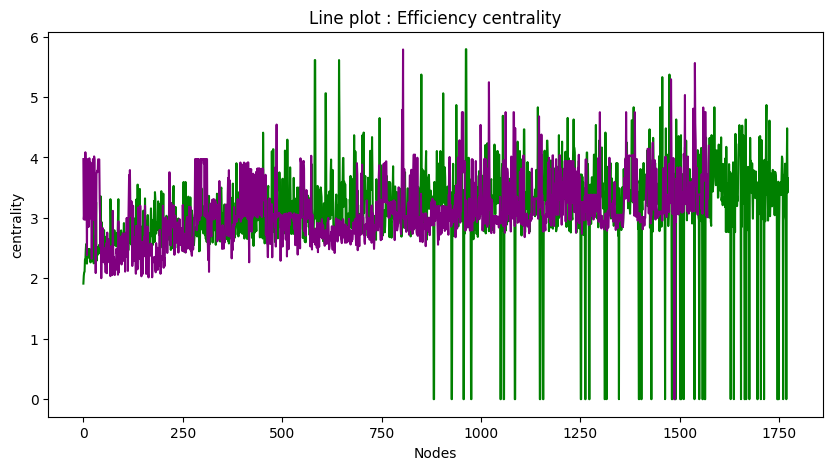

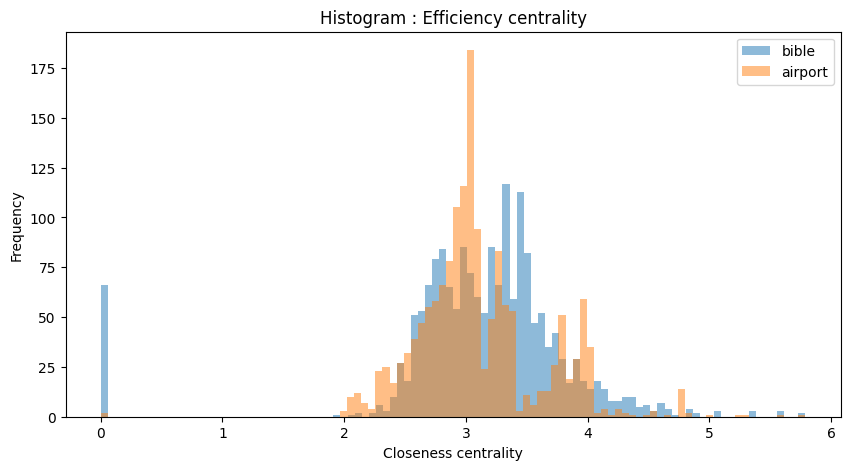

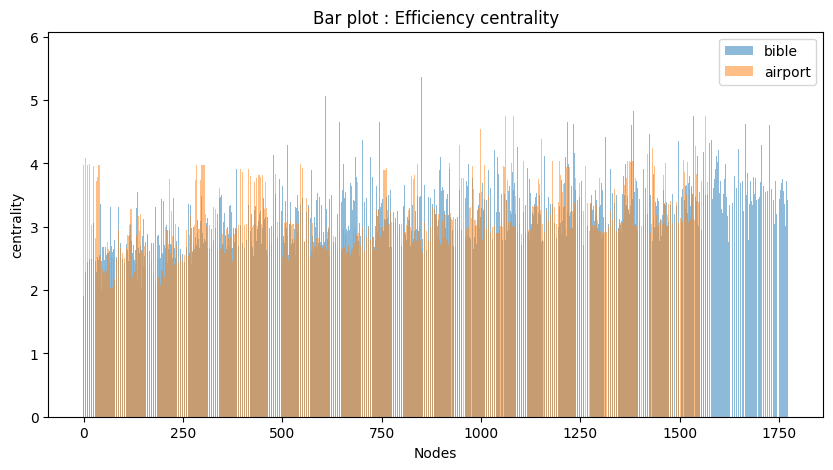

In [18]:
write_to_file('efficiency_centrality_airport_graph', efficiency_centrality(airport_edges),folder_path = path)  
write_to_file('efficiency_centrality_bible_graph', efficiency_centrality(bible_edges),folder_path = path)
plotting(bible_edges, airport_edges , efficiency_centrality, 'Efficiency centrality' )

In [14]:
def degree_centrality(graph):
    dic = {}
    for node in graph.nodes:
        dic[node] = graph.degree(node) / graph.number_of_nodes()
    return dic

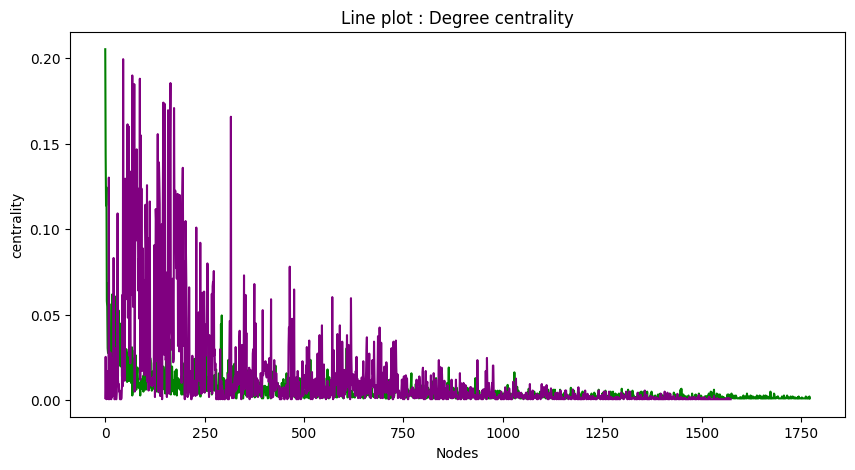

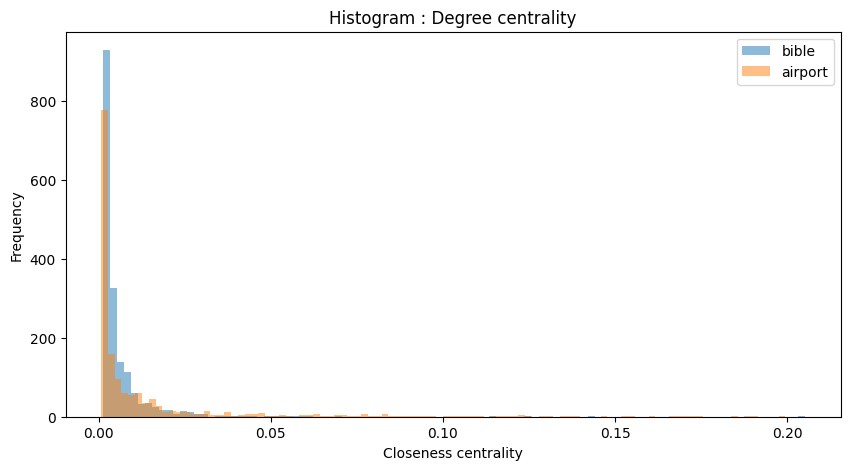

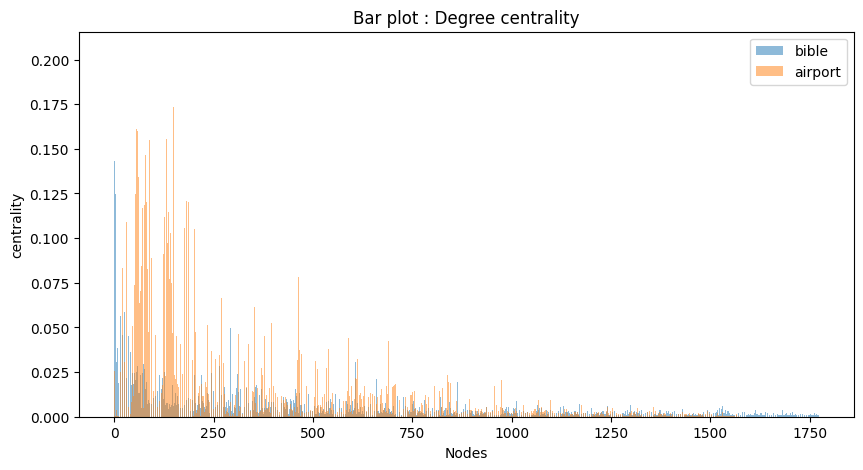

In [19]:
airport_degree = degree_centrality(airport_edges)
bible_degree = degree_centrality(airport_edges)
write_to_file('degree_centrality_airport_graph', airport_degree,folder_path = path)
write_to_file('degree_centrality_bible_graph', bible_degree,folder_path = path)
plotting(bible_edges, airport_edges , degree_centrality, 'Degree centrality')

In [20]:
def katz_centrality(graph):
    alpha = 0.5
    beta = 0.2
    gamma = 1
    scores = {}
    for node in graph.nodes():
        temp_score = 0
        for neighbor in graph.neighbors(node):
            temp_score += alpha * graph.degree(neighbor)
            for neighbor_neighbor in graph.neighbors(neighbor):
                temp_score += beta * graph.degree(neighbor_neighbor)

        scores[node] = temp_score + gamma

    return scores



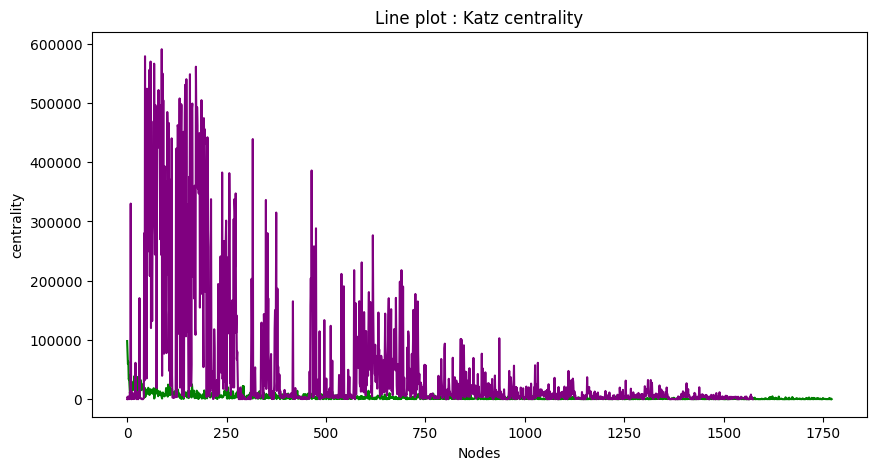

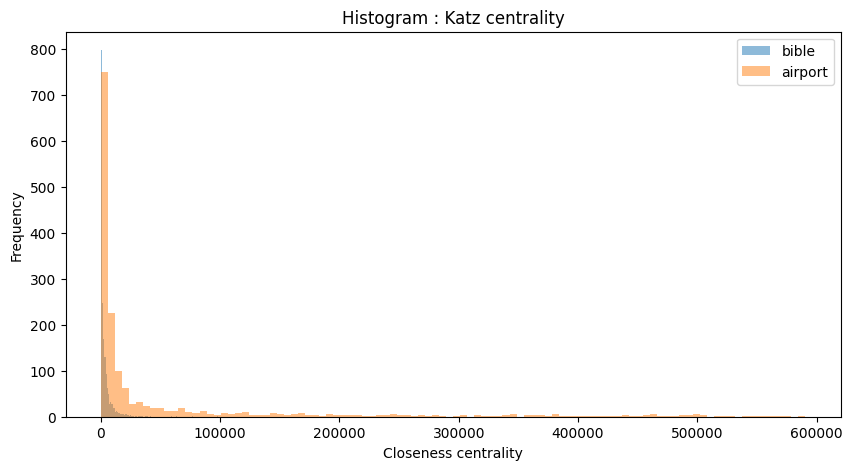

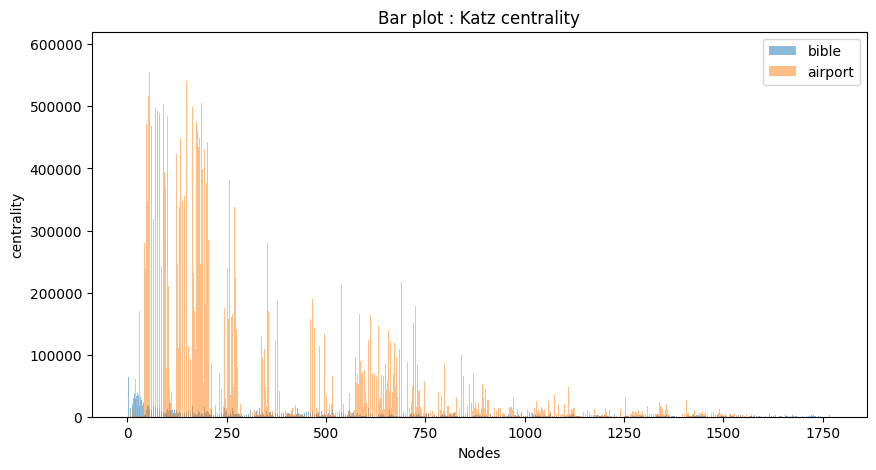

In [21]:
airport_katz = katz_centrality(airport_edges)
bible_katz = katz_centrality(airport_edges)
write_to_file('katz_centrality_airport_graph',airport_katz ,folder_path = path)
write_to_file('katz_centrality_bible_graph', bible_katz ,folder_path = path)
plotting(bible_edges, airport_edges , katz_centrality, 'Katz centrality')

In [23]:

def read_file(path , namefile):    
    f = open(path + namefile, 'r')
    data = f.readlines()

    d = dict()

    for line in data:
        key, value = line.split(':')
        d[key] = value

    return d

In [24]:
result_path = './Results/'

In [25]:
def top_largest(dictionary, top):
    return heapq.nlargest(top, dictionary, key=dictionary.get)


In [26]:
airport_features =['closeness_centrality_airport_graph', 'efficiency_centrality_airport_graph', 'degree_centrality_airport_graph', 'katz_centrality_airport_graph']
bible_features =['closeness_centrality_Bible_graph', 'efficiency_centrality_bible_graph', 'degree_centrality_bible_graph', 'katz_centrality_bible_graph']

airport_analysis = pd.DataFrame(columns = ['closeness', 'efficiency', 'degree', 'katz'])
bible_analysis = pd.DataFrame(columns = ['closeness', 'efficiency', 'degree'])

airport_closeness_result = read_file(result_path, airport_features[0])
airport_efficiency_result = read_file(result_path, airport_features[1])
airport_degree_result = read_file(result_path, airport_features[2])
airport_katz_result = read_file(result_path, airport_features[3])

bible_closeness_result = read_file(result_path, bible_features[0])
bible_efficiency_result = read_file(result_path, bible_features[1])
bible_degree_result = read_file(result_path, bible_features[2])
bible_katz_result = read_file(result_path, bible_features[3])

airport_analysis['closeness'] = top_largest(airport_closeness_result, 10)
airport_analysis['efficiency'] = top_largest(airport_efficiency_result, 10)
airport_analysis['degree'] = top_largest(airport_degree_result, 10)
airport_analysis['katz'] = top_largest(airport_katz_result, 10)

bible_analysis['closeness'] = top_largest(bible_closeness_result, 10)
bible_analysis['efficiency'] = top_largest(bible_efficiency_result, 10)
bible_analysis['degree'] = top_largest(bible_degree_result, 10)

airport_analysis = airport_analysis.astype(int)
bible_analysis = bible_analysis.astype(int)

print('top results for airport is  : \n',airport_analysis)
print('\ntop results for bible is  : \n',bible_analysis)

top results for airport is  : 
    closeness  efficiency  degree  katz
0        114         804     114   417
1        877        1538     709  1025
2       1068        1478    1200   405
3        389        1020     877  1089
4        709        1513     766  1511
5        766        1559     389  1777
6        982        1534     500  1801
7       1200         802    1068  1815
8        500        1062     711  1842
9        711        1365    1016  1849

top results for bible is  : 
    closeness  efficiency  degree
0          1         962     114
1          2         963     709
2          3         582    1200
3          4         583     877
4         10         643     766
5         27         850     389
6         29        1474     500
7         19        1456    1068
8         34         609     711
9          6         610    1016


In [27]:
bible_names = pd.read_csv('../Data/bible.names', sep=' ')
bible_names['ID'] = bible_names['ID'].astype(int)
bible_names


,ID,biblicalNouns
0,1,israel
1,2,judah
2,3,jerusalem
3,4,david
4,5,saul
...,...,...
1768,1769,cabul
1769,1770,berothai
1770,1771,nephish
1771,1772,philippi


In [28]:
airports_names = pd.read_csv('../Data/airports.codes', sep=' ')
airports_names['ID'] = airports_names['ID'].astype(int)
airports_names


,ID,AirportName
0,1,06A
1,2,08A
2,3,1G4
3,4,6B0
4,5,8F3
...,...,...
1853,1854,ZXH
1854,1855,ZXM
1855,1856,ZXN
1856,1857,ZXT


In [29]:
airport_analysis_names = airport_analysis.copy()
def get_name(id, df):
    value = df[ df['ID'] == id][df.columns[1]].values[0]
    return value
    
def get_names(ids, df):
    names = []
    for id in ids:
        names.append(get_name(id, df))
    return names
airport_analysis_names['closeness'] = get_names(airport_analysis_names['closeness'], airports_names)
airport_analysis_names['efficiency'] = get_names(airport_analysis_names['efficiency'], airports_names)
airport_analysis_names['degree'] = get_names(airport_analysis_names['degree'], airports_names)
airport_analysis_names['katz'] = get_names(airport_analysis_names['katz'], airports_names)

airport_analysis_names

,closeness,efficiency,degree,katz
0,ATL,KFP,ATL,DPA
1,LAX,SWB,IAD,MKL
2,MSP,SLW,ORD,DMA
3,DEN,MIL,LAX,MVW
4,IAD,STE,JFK,SSW
5,JFK,TAO,DEN,YGE
6,MCO,SVO,EWR,YPW
7,ORD,KEH,MSP,YTG
8,EWR,MS2,IAH,ZEL
9,IAH,RKS,MIA,ZTS


In [30]:
bible_analysis_names = bible_analysis.copy()

bible_analysis_names['closeness'] = get_names(bible_analysis_names['closeness'], bible_names)
bible_analysis_names['efficiency'] = get_names(bible_analysis_names['efficiency'], bible_names)
bible_analysis_names['degree'] = get_names(bible_analysis_names['degree'], bible_names)

bible_analysis_names

,closeness,efficiency,degree
0,israel,jimnah,levi
1,judah,jared,achsah
2,jerusalem,zur,jose
3,david,almodad,zimmah
4,egypt,sheshai,rahab
5,ephraim,mehetabel,ziklag
6,manasseh,titus,henadad
7,benjamin,paulus,timnath
8,joseph,pontius,magdiel
9,moses,riphath,jehdeiah
